# Exploratory Data Analysis

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import json
import numpy as np
import itertools

## Sample Images from Each Class

In [92]:
# Load the labels into a Pandas DataFrame
df = pd.read_csv("data/train.csv", header=0)

# Load the mapping from label to disease name into a dictionary
with open("data/label_num_to_disease_map.json", "r") as f:
    disease_map = json.load(f)

In [93]:
# Get the counts of each class
counts = df.label.value_counts()
counts.index = counts.index.map(lambda label: disease_map[str(label)])
print(counts)

Cassava Mosaic Disease (CMD)           13158
Healthy                                 2577
Cassava Green Mottle (CGM)              2386
Cassava Brown Streak Disease (CBSD)     2189
Cassava Bacterial Blight (CBB)          1087
Name: label, dtype: int64


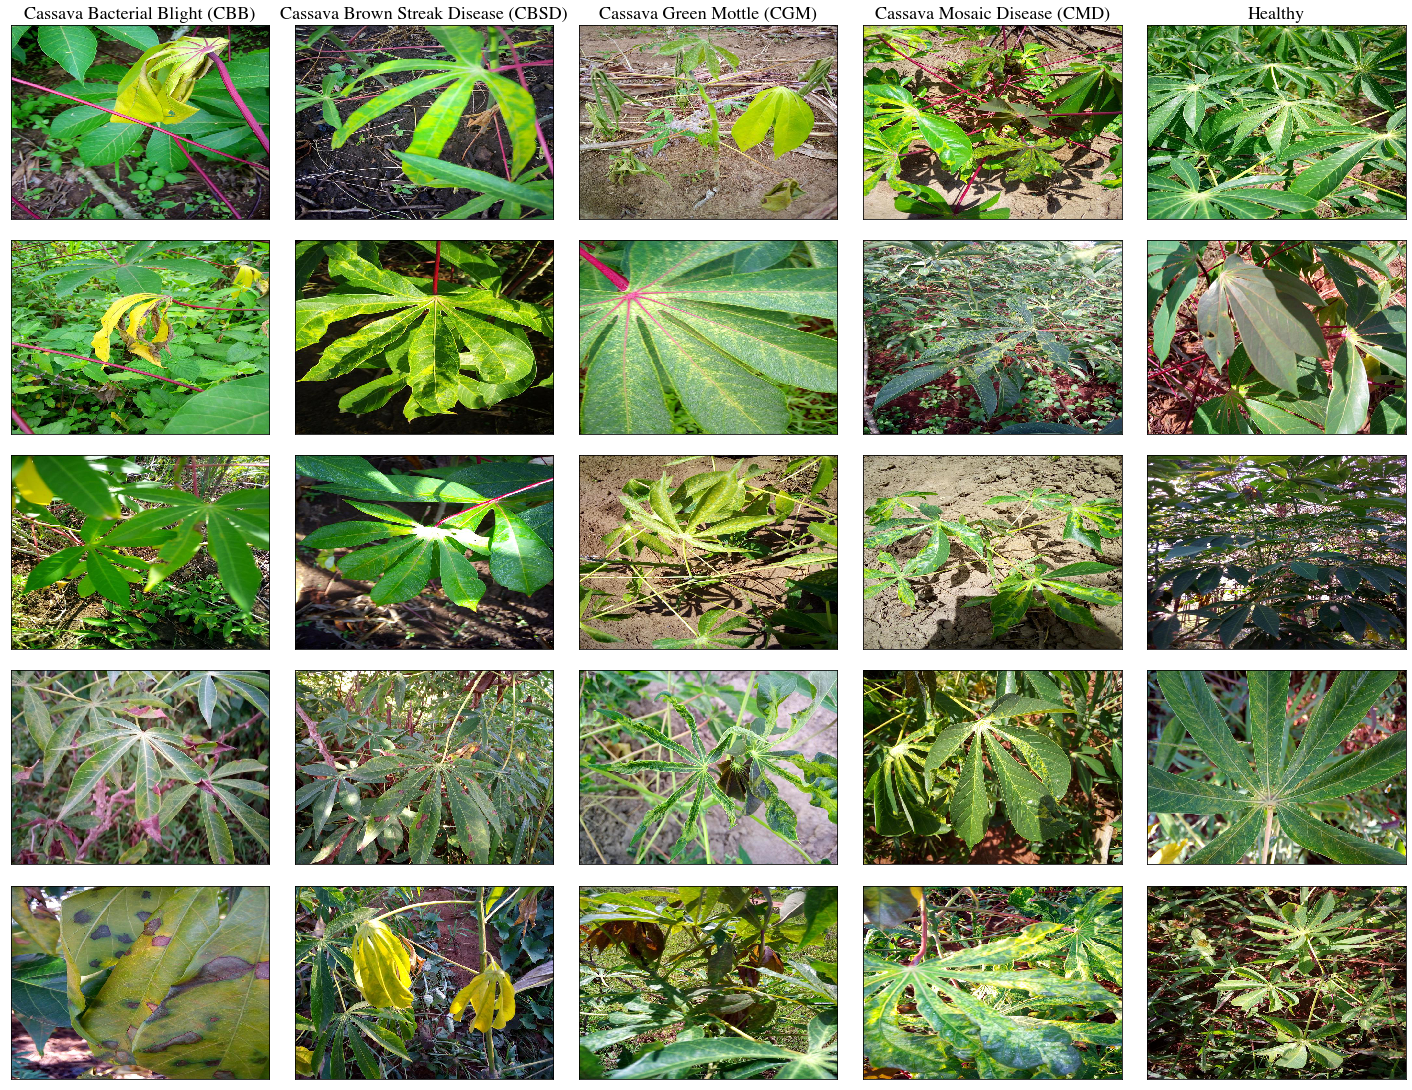

In [94]:
# Number of samples from each class to look at
n_sample = 5

# Number of classes in the dataset
n_class = len(df.label.unique())

# Create a figure for the images
fig, axs = plt.subplots(nrows=n_sample, ncols=n_class, figsize=(5*n_class, 0.777*5*n_sample))

# Iterate over the classes
for label_unique in sorted(df.label.unique()):
    # Sample the dataset for the class
    samples = df[df.label == label_unique].sample(n_sample, random_state=0)
    
    # Iterate over each sample
    for i, row in enumerate(samples.iterrows()):
        # Plot the sample
        img = mpimg.imread("data/train_images/" + row[1].image_id)
        
        # Plot formatting
        axs[i, label_unique].imshow(img, interpolation="none")
        axs[i, label_unique].set_xticks([])
        axs[i, label_unique].set_yticks([])
        
    # Add titles to show the disease name
    axs[0, label_unique].set_title(disease_map[str(label_unique)], fontsize=18, fontfamily="Times")
    
# Plot settings
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Save the figure
#plt.savefig("eda-sample-images.png", dpi=200)

In [37]:
n_image = len(df)

df["r_med"] = np.zeros(n_image)
df["g_med"] = np.zeros(n_image)
df["b_med"] = np.zeros(n_image)

for idx, row in df.iterrows():
    if idx % 1_000 == 0 and idx > 0:
        print(f"processed {idx} out of {n_image} images...")
    img = mpimg.imread("data/train_images/" + row.image_id)
    df["r_med"].iloc[idx] = np.median(img[:,:,0])
    df["g_med"].iloc[idx] = np.median(img[:,:,1])
    df["b_med"].iloc[idx] = np.median(img[:,:,2])
    

/Users/maitreya/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


processed 1000 out of 21397 images...
processed 2000 out of 21397 images...
processed 3000 out of 21397 images...
processed 4000 out of 21397 images...
processed 5000 out of 21397 images...
processed 6000 out of 21397 images...
processed 7000 out of 21397 images...
processed 8000 out of 21397 images...
processed 9000 out of 21397 images...
processed 10000 out of 21397 images...
processed 11000 out of 21397 images...
processed 12000 out of 21397 images...
processed 13000 out of 21397 images...
processed 14000 out of 21397 images...
processed 15000 out of 21397 images...
processed 16000 out of 21397 images...
processed 17000 out of 21397 images...
processed 18000 out of 21397 images...
processed 19000 out of 21397 images...
processed 20000 out of 21397 images...
processed 21000 out of 21397 images...


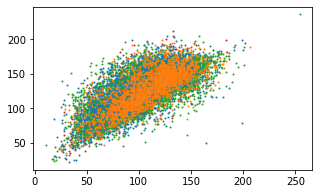

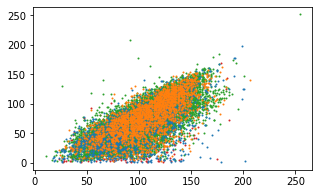

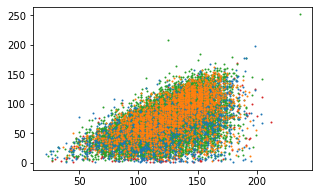

In [43]:
for c1, c2 in itertools.combinations(["r_med", "g_med", "b_med"], 2):
    plt.figure(figsize=(5,3))
    for label_unique, color in zip(df.label.unique(), ["tab:red", "tab:green", "tab:blue", "tab:orange"]):
        plt.scatter(df[df.label == label_unique][c1], df[df.label == label_unique][c2], c=color, s=1)